## ***CRIME DATA ANALYSIS***

NYPD hate crime data analysis delves into uncovering trends in the data, both in terms of temporal patterns, like changes over time, 
and geospatial distribution, identifying areas with higher concentrations of hate crimes. Examining the details of the data, including offense types,
associated law codes, bias motivations behind the crimes, and arrest trends, provides a deeper understanding of the nature of these incidents and 
how law enforcement responds.
The below New York City Police Department(NYPD) dataset contains 14 attributes such as Compaint Number,Offense Category,Arrest Date,Patrol,Country

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df=pd.read_csv("nypd_dataset.csv")
df.tail(10)

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
2396,202102812603617,2021,11,11/03/2021,28,PATROL BORO MAN NORTH,NEW YORK,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,NaN,M33707356
2397,202302812238517,2023,4,04/04/2023,28,PATROL BORO MAN NORTH,NEW YORK,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,NaN,M35688018
2398,202302812145517,2023,2,02/13/2023,28,PATROL BORO MAN NORTH,NEW YORK,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-HISPANIC,Ethnicity/National Origin/Ancestry,NaN,M35678631
2399,201902812178417,2019,3,03/08/2019,28,PATROL BORO MAN NORTH,NEW YORK,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,NaN,M31701654
2400,202003012103417,2020,1,01/24/2020,30,PATROL BORO MAN NORTH,NEW YORK,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-LGBT (MIXED GROUP),Sexual Orientation,NaN,M32678917
2401,202003012103417,2020,1,01/24/2020,30,PATROL BORO MAN NORTH,NEW YORK,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-LGBT (MIXED GROUP),Sexual Orientation,NaN,M32676128
2402,202203312647917,2022,11,11/23/2022,33,PATROL BORO MAN NORTH,NEW YORK,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-BLACK,Race/Color,NaN,M34718332
2403,202303412237417,2023,3,03/11/2023,34,PATROL BORO MAN NORTH,NEW YORK,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,NaN,M35682469
2404,202303412235817,2023,3,03/10/2023,34,PATROL BORO MAN NORTH,NEW YORK,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-BLACK,Race/Color,NaN,M35682413
2405,202203412641017,2022,9,09/08/2022,34,PATROL BORO MAN NORTH,NEW YORK,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-HISPANIC,Ethnicity/National Origin/Ancestry,NaN,M34705708


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2406 entries, 0 to 2405
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Full Complaint ID              2406 non-null   int64  
 1   Complaint Year Number          2406 non-null   int64  
 2   Month Number                   2406 non-null   int64  
 3   Record Create Date             2406 non-null   object 
 4   Complaint Precinct Code        2406 non-null   int64  
 5   Patrol Borough Name            2406 non-null   object 
 6   County                         2406 non-null   object 
 7   Law Code Category Description  2406 non-null   object 
 8   Offense Description            2406 non-null   object 
 9   PD Code Description            2406 non-null   object 
 10  Bias Motive Description        2406 non-null   object 
 11  Offense Category               2406 non-null   object 
 12  Arrest Date                    0 non-null      f

In [38]:
df.columns

Index(['Full Complaint ID', 'Complaint Year Number', 'Month Number',
       'Record Create Date', 'Complaint Precinct Code', 'Patrol Borough Name',
       'County', 'Law Code Category Description', 'Offense Description',
       'PD Code Description', 'Bias Motive Description', 'Offense Category',
       'Arrest Date', 'Arrest Id'],
      dtype='object')

In [39]:
df=df[['Record Create Date', 'Complaint Precinct Code', 'Patrol Borough Name',
       'County', 'Law Code Category Description', 'Offense Description',
       'PD Code Description', 'Bias Motive Description', 'Offense Category']]
df

,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category
0,03/07/2022,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice
1,02/08/2020,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice
2,05/23/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice
3,04/02/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice
4,05/01/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice
...,...,...,...,...,...,...,...,...,...
2401,01/24/2020,30,PATROL BORO MAN NORTH,NEW YORK,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-LGBT (MIXED GROUP),Sexual Orientation
2402,11/23/2022,33,PATROL BORO MAN NORTH,NEW YORK,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-BLACK,Race/Color
2403,03/11/2023,34,PATROL BORO MAN NORTH,NEW YORK,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color
2404,03/10/2023,34,PATROL BORO MAN NORTH,NEW YORK,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-BLACK,Race/Color


In [40]:
df['record_date']=pd.to_datetime(df['Record Create Date'])
df['Date']=df['record_date'].dt.day
df['Day']=df['record_date'].dt.strftime("%a")
df['Month']=df['record_date'].dt.strftime("%b")
df['Year']=df['record_date'].dt.strftime("%Y")
df

,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,record_date,Date,Day,Month,Year
0,03/07/2022,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,2022-03-07,7,Mon,Mar,2022
1,02/08/2020,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,2020-02-08,8,Sat,Feb,2020
2,05/23/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,2023-05-23,23,Tue,May,2023
3,04/02/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,2023-04-02,2,Sun,Apr,2023
4,05/01/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,2023-05-01,1,Mon,May,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2401,01/24/2020,30,PATROL BORO MAN NORTH,NEW YORK,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-LGBT (MIXED GROUP),Sexual Orientation,2020-01-24,24,Fri,Jan,2020
2402,11/23/2022,33,PATROL BORO MAN NORTH,NEW YORK,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-BLACK,Race/Color,2022-11-23,23,Wed,Nov,2022
2403,03/11/2023,34,PATROL BORO MAN NORTH,NEW YORK,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,2023-03-11,11,Sat,Mar,2023
2404,03/10/2023,34,PATROL BORO MAN NORTH,NEW YORK,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-BLACK,Race/Color,2023-03-10,10,Fri,Mar,2023


In [41]:
df = df[['Date', 'Month', 'Year', 'Day', 'record_date', 'Patrol Borough Name', 'County', 'Law Code Category Description',
         'Bias Motive Description', 'Offense Category', 'Complaint Precinct Code']]

df.head()

,Date,Month,Year,Day,record_date,Patrol Borough Name,County,Law Code Category Description,Bias Motive Description,Offense Category,Complaint Precinct Code
0,7,Mar,2022,Mon,2022-03-07,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60
1,8,Feb,2020,Sat,2020-02-08,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60
2,23,May,2023,Tue,2023-05-23,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60
3,2,Apr,2023,Sun,2023-04-02,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60
4,1,May,2023,Mon,2023-05-01,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60


In [42]:
#renaming columns
df.columns = ['date', 'month', 'year', 'day', 'record_date', 'patrol', 'county', 'crime', 'motive', 'offense', 'precinct']
df.head()

,date,month,year,day,record_date,patrol,county,crime,motive,offense,precinct
0,7,Mar,2022,Mon,2022-03-07,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60
1,8,Feb,2020,Sat,2020-02-08,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60
2,23,May,2023,Tue,2023-05-23,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60
3,2,Apr,2023,Sun,2023-04-02,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60
4,1,May,2023,Mon,2023-05-01,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60


In [43]:
patrol_rename={'PATROL BORO BKLYN NORTH':'Brooklyn_N',
               'PATROL BORO BKLYN SOUTH': 'Brooklyn_S',
                'PATROL BORO MAN SOUTH': 'Man_S',
                'PATROL BORO MAN NORTH': 'Man_N',
                'PATROL BORO QUEENS SOUTH': 'Queens_S', 
                'PATROL BORO QUEENS NORTH': 'Queens_N',
                'PATROL BORO BRONX': 'Bronx', 
                'PATROL BORO STATEN ISLAND': 'Staten'}

offense_rename={'Religion/Religious Practice':'Religion','Race/Color':'Race',
                'Ethnicity/National Origin/Ancestry':'Origin','Gender' : 'Gender',
                'Sexual Orientation' : 'Orientation', 'Disability' : 'Diabled', 
                'Age' : 'Age'}
df.loc[:, 'patrol']=df['patrol'].replace(patrol_rename)
df.loc[:,'offense']=df['patrol'].replace(offense_rename)
df.loc[:,'motive'] = df['motive'].str.capitalize()
df.loc[:,'county'] = df['county'].str.capitalize()
df.loc[:,'crime'] = df['crime'].str.capitalize()

In [44]:
df.tail(10)

,date,month,year,day,record_date,patrol,county,crime,motive,offense,precinct
2396,3,Nov,2021,Wed,2021-11-03,Man_N,New york,Misdemeanor,Anti-male homosexual (gay),Man_N,28
2397,4,Apr,2023,Tue,2023-04-04,Man_N,New york,Misdemeanor,Anti-male homosexual (gay),Man_N,28
2398,13,Feb,2023,Mon,2023-02-13,Man_N,New york,Misdemeanor,Anti-hispanic,Man_N,28
2399,8,Mar,2019,Fri,2019-03-08,Man_N,New york,Misdemeanor,Anti-white,Man_N,28
2400,24,Jan,2020,Fri,2020-01-24,Man_N,New york,Misdemeanor,Anti-lgbt (mixed group),Man_N,30
2401,24,Jan,2020,Fri,2020-01-24,Man_N,New york,Misdemeanor,Anti-lgbt (mixed group),Man_N,30
2402,23,Nov,2022,Wed,2022-11-23,Man_N,New york,Misdemeanor,Anti-black,Man_N,33
2403,11,Mar,2023,Sat,2023-03-11,Man_N,New york,Misdemeanor,Anti-white,Man_N,34
2404,10,Mar,2023,Fri,2023-03-10,Man_N,New york,Misdemeanor,Anti-black,Man_N,34
2405,8,Sep,2022,Thu,2022-09-08,Man_N,New york,Misdemeanor,Anti-hispanic,Man_N,34


In [45]:
df.loc[:,'precinct']=df['precinct'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2406 entries, 0 to 2405
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2406 non-null   int32         
 1   month        2406 non-null   object        
 2   year         2406 non-null   object        
 3   day          2406 non-null   object        
 4   record_date  2406 non-null   datetime64[ns]
 5   patrol       2406 non-null   object        
 6   county       2406 non-null   object        
 7   crime        2406 non-null   object        
 8   motive       2406 non-null   object        
 9   offense      2406 non-null   object        
 10  precinct     2406 non-null   object        
dtypes: datetime64[ns](1), int32(1), object(9)
memory usage: 197.5+ KB


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10492\1771093076.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['60' '60' '60' ... '34' '34' '34']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,'precinct']=df['precinct'].astype(str)


In [46]:
df=df.sort_values(by='record_date').reset_index(drop=True)
df.drop('record_date',axis=1,inplace=True)


In [47]:
df

,date,month,year,day,patrol,county,crime,motive,offense,precinct
0,1,Jan,2019,Tue,Brooklyn_S,Kings,Misdemeanor,Anti-jewish,Brooklyn_S,71
1,2,Jan,2019,Wed,Man_S,New york,Felony,Anti-arab,Man_S,14
2,3,Jan,2019,Thu,Man_N,New york,Misdemeanor,Anti-jewish,Man_N,20
3,3,Jan,2019,Thu,Man_N,New york,Misdemeanor,Anti-jewish,Man_N,20
4,3,Jan,2019,Thu,Man_S,New york,Misdemeanor,Anti-male homosexual (gay),Man_S,5
...,...,...,...,...,...,...,...,...,...,...
2401,26,Sep,2023,Tue,Man_S,New york,Felony,Anti-black,Man_S,10
2402,27,Sep,2023,Wed,Man_S,New york,Misdemeanor,Anti-black,Man_S,1
2403,29,Sep,2023,Fri,Brooklyn_S,Kings,Felony,Anti-male homosexual (gay),Brooklyn_S,60
2404,29,Sep,2023,Fri,Brooklyn_N,Kings,Violation,Anti-hispanic,Brooklyn_N,90


## **EDA**

In [48]:
counts=df['year'].value_counts().sort_index()

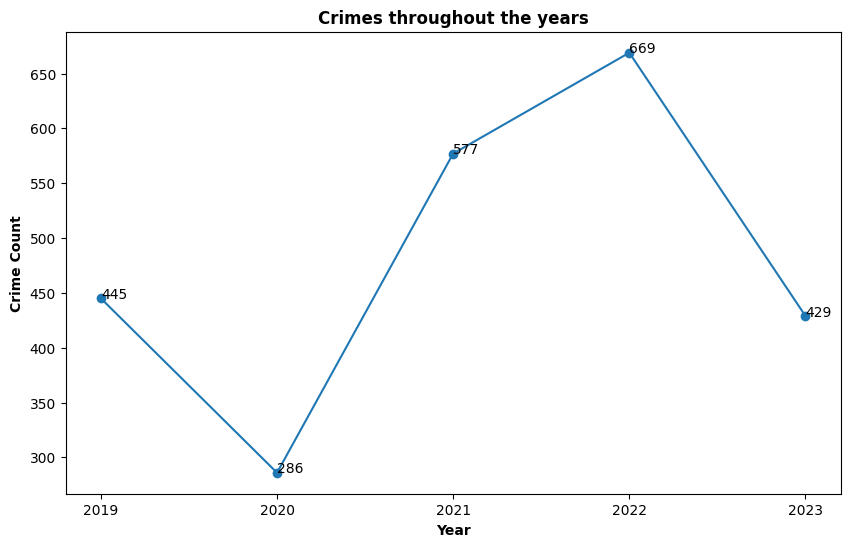

In [49]:
plt.figure(figsize=(10,6))
plt.plot(counts.index,counts.values,marker='o',linestyle='-')
plt.title("Crimes throughout the years",fontweight='bold')
plt.ylabel('Crime Count',fontweight='bold')
plt.xlabel('Year',fontweight='bold')
for i,j in enumerate(counts.values):
    plt.text(i,j,str(j))

From the above plot we can observe the year 2022 having highest number of crimes and 2020 having the lowest.Year 2022 was suffernig from the pandemic but was not relieved from crimes across the world.

In [50]:
df['month'].value_counts()

month
Mar    274
May    266
Jun    244
Apr    216
Feb    209
Jul    204
Aug    195
Sep    191
Jan    169
Oct    165
Nov    141
Dec    132
Name: count, dtype: int64

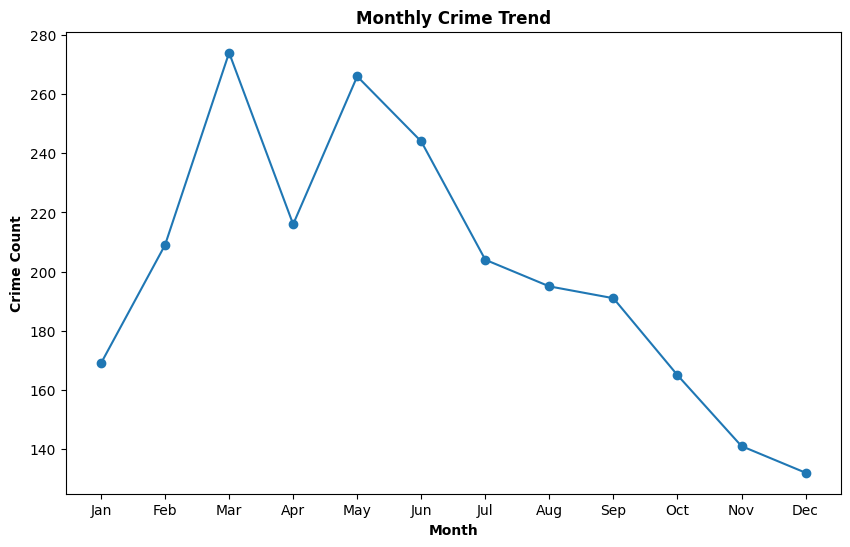

In [51]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# convert 'month' column to categorical with correct order
df['month'] = pd.Categorical(df['month'], categories = month_order, ordered=True)
counts = df['month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(counts.index, counts.values, marker='o', linestyle='-')
plt.title('Monthly Crime Trend', fontweight='bold')
plt.ylabel('Crime Count', fontweight='bold')
plt.xlabel('Month', fontweight='bold')
plt.show()

Though crimes cannot be bounded by certain months or can be predicted for any month it has been observed month of March and May
have the highest number of crimes.

## **Monthly trend**

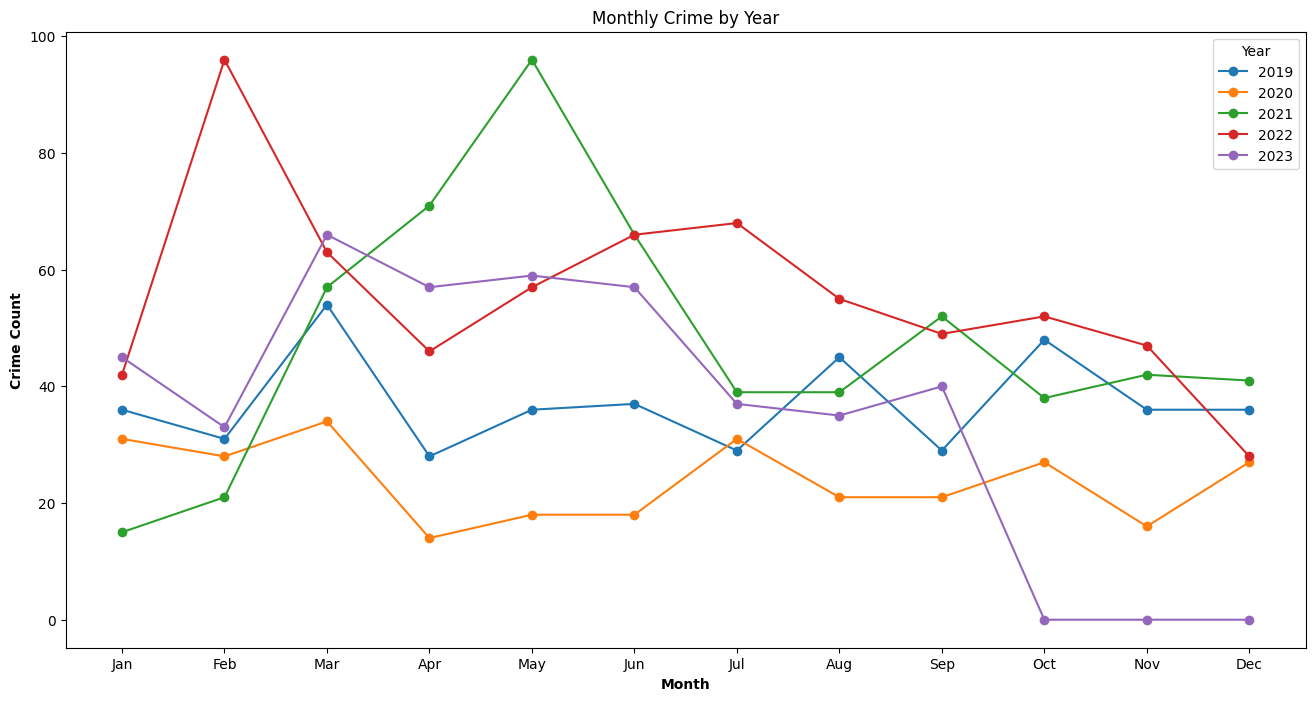

In [52]:
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month']=pd.Categorical(df['month'],categories=months,ordered=True)
counts=df['month'].value_counts().sort_index()
unique=df['year'].unique()
plt.figure(figsize=(16,8))
for year in unique:
    y_data=df[df['year']==year]
    m_data=y_data['month'].value_counts().sort_index()
    plt.plot(m_data.index,m_data.values,marker='o',label=str(year))
plt.title("Monthly Crime by Year")
plt.ylabel('Crime Count', fontweight='bold')
plt.xlabel('Month', fontweight='bold')
plt.legend(title='Year')

Text(0.5, 0, 'Day')

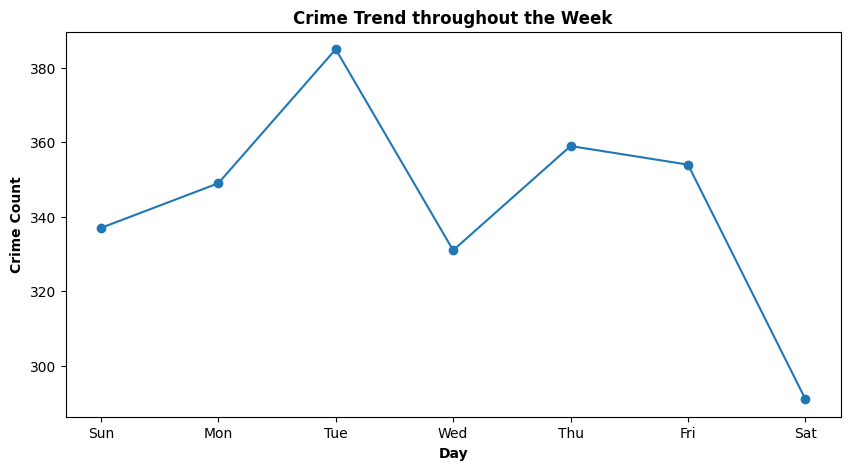

In [53]:
days=['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
df['day']=pd.Categorical(df['day'],categories=days,ordered=True)
counts=df['day'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.plot(counts.index,counts.values,marker='o',linestyle='-')
plt.title('Crime Trend throughout the Week', fontweight='bold')
plt.ylabel('Crime Count', fontweight='bold')
plt.xlabel('Day', fontweight='bold')

In [54]:
patrol_count=df['patrol'].value_counts().sort_index()
patrol_count

patrol
Bronx         169
Brooklyn_N    374
Brooklyn_S    445
Man_N         320
Man_S         557
Queens_N      287
Queens_S      164
Staten         90
Name: count, dtype: int64

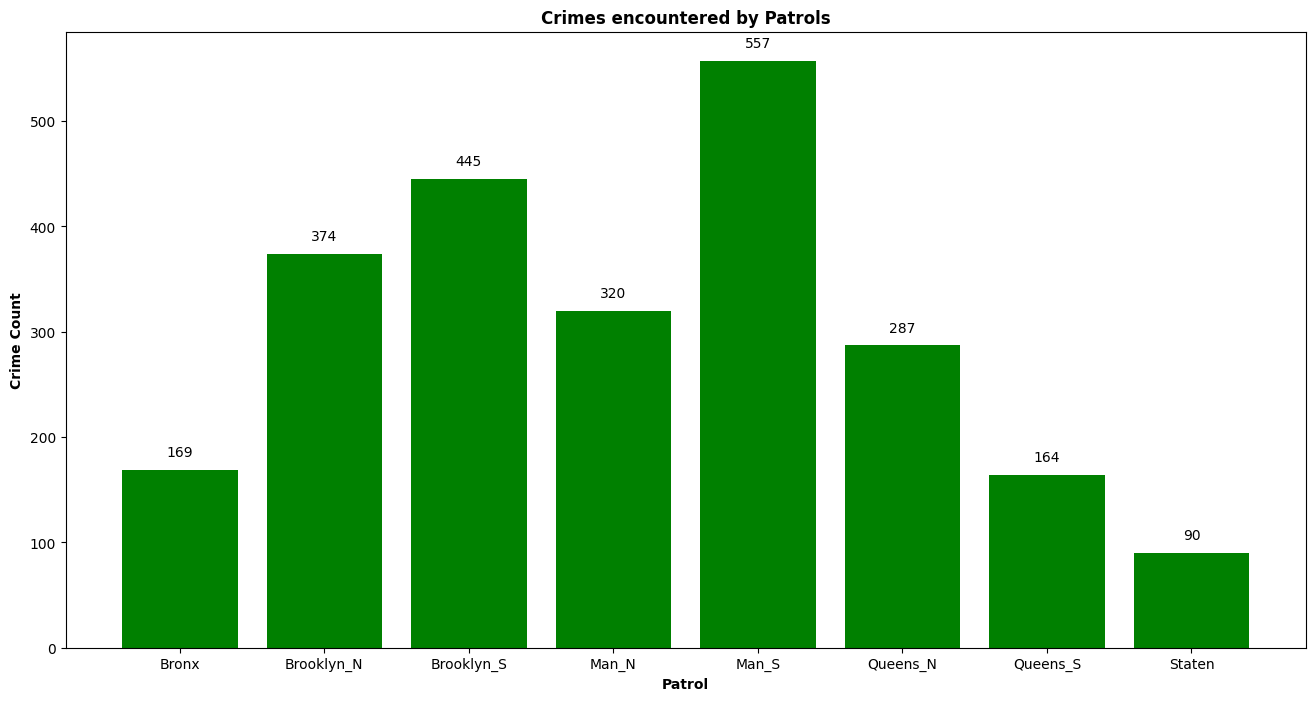

In [55]:
num=len(patrol_count)
plt.figure(figsize=(16,8))
bars=plt.bar(patrol_count.index,patrol_count.values,color='green')
plt.title('Crimes encountered by Patrols', fontweight='bold')
plt.ylabel('Crime Count', fontweight='bold')
plt.xlabel('Patrol', fontweight='bold')
for i in bars:
    y_index=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,y_index+10,round(y_index),ha='center',va='bottom')

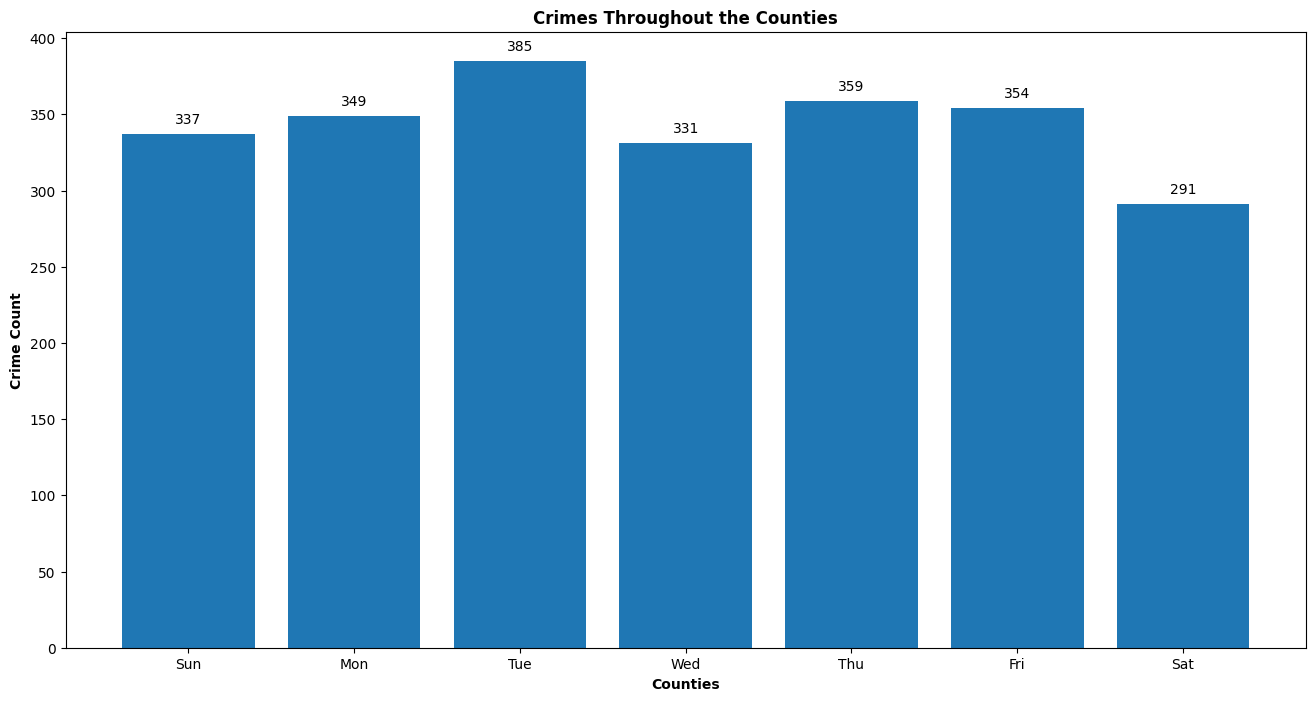

In [56]:
conuts=df['county'].value_counts().sort_index()
num=len(counts)
plt.figure(figsize=(16,8))
bars=plt.bar(counts.index,counts.values)
plt.title('Crimes Throughout the Counties', fontweight = 'bold')
plt.ylabel('Crime Count', fontweight = 'bold')
plt.xlabel('Counties', fontweight = 'bold')
for i in bars:
    y_index = i.get_height()
    plt.text(i.get_x()+i.get_width()/2, y_index+5,round(y_index),ha='center',va='bottom')


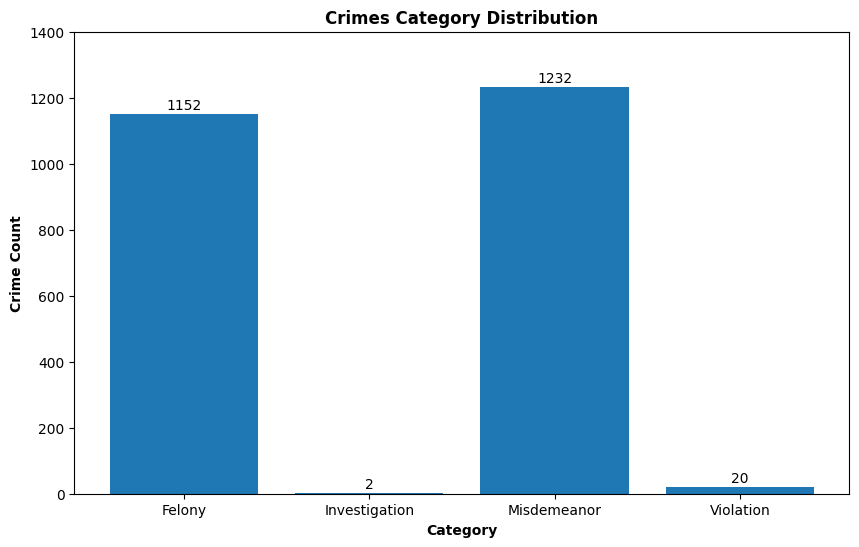

In [57]:
counts = df['crime'].value_counts().sort_index()
num_counties = len(counts)
plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values)

plt.title('Crimes Category Distribution', fontweight = 'bold')
plt.ylabel('Crime Count', fontweight = 'bold')
plt.xlabel('Category', fontweight = 'bold')
plt.ylim(0, 1400)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom')


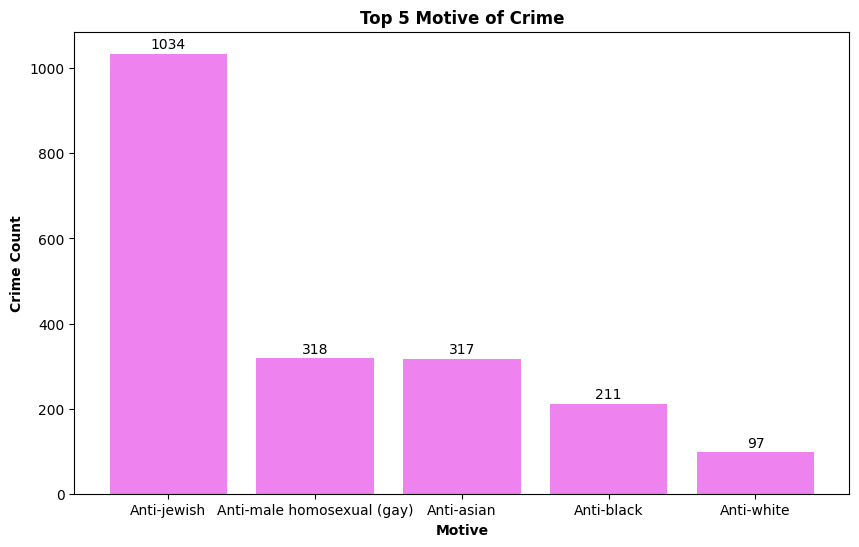

In [58]:
counts = df['motive'].value_counts()
top_5_counts = counts.head(5)
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_counts.index, top_5_counts.values,color='violet')

plt.title('Top 5 Motive of Crime', fontweight = 'bold')
plt.ylabel('Crime Count', fontweight = 'bold')
plt.xlabel('Motive', fontweight = 'bold')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom')


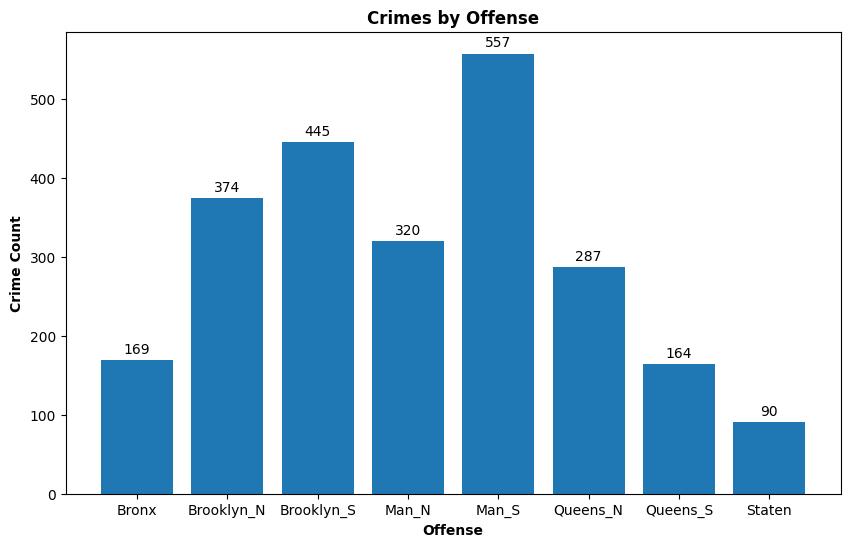

In [59]:
counts=df['offense'].value_counts().sort_index()
num_counties = len(counts)

plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values)

plt.title('Crimes by Offense', fontweight = 'bold')
plt.ylabel('Crime Count', fontweight = 'bold')
plt.xlabel('Offense', fontweight = 'bold')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom')


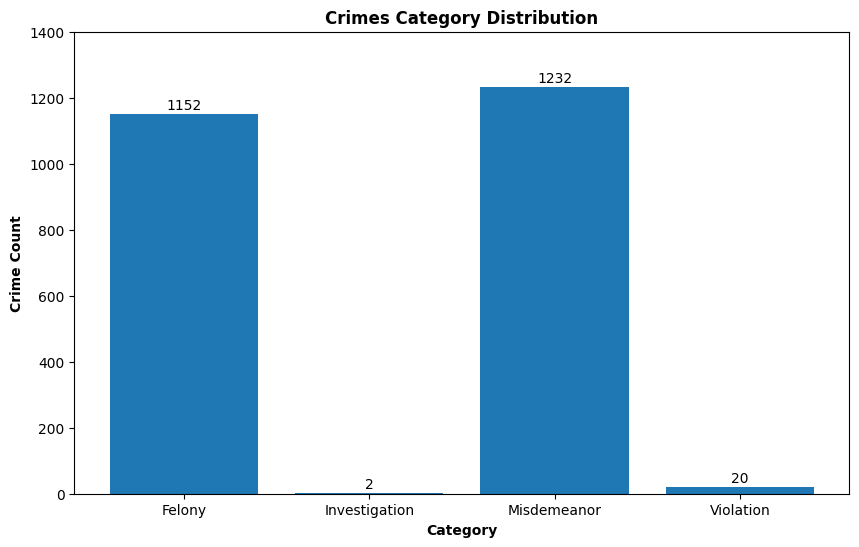

In [60]:
counts = df['crime'].value_counts().sort_index()
num_counties = len(counts)

plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values)

plt.title('Crimes Category Distribution', fontweight = 'bold')
plt.ylabel('Crime Count', fontweight = 'bold')
plt.xlabel('Category', fontweight = 'bold')
plt.ylim(0, 1400)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom')


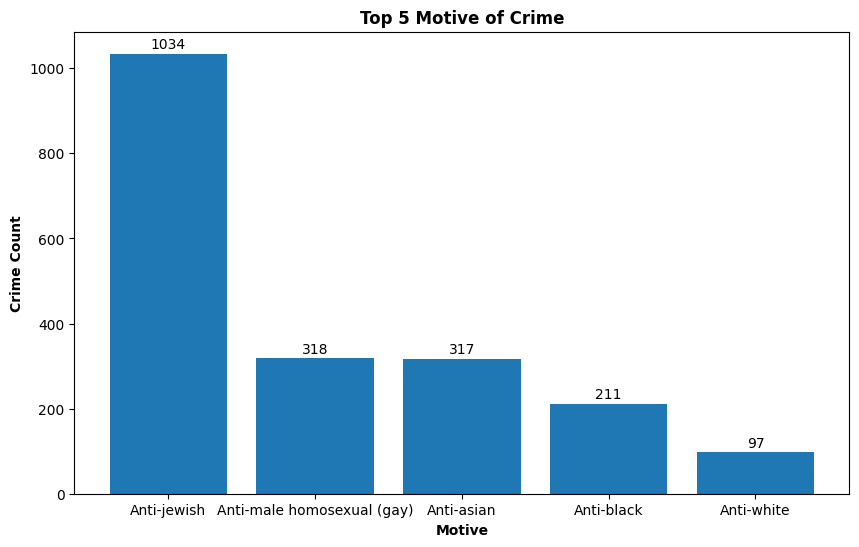

In [61]:
counts = df['motive'].value_counts()
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_counts.index, top_5_counts.values)

plt.title('Top 5 Motive of Crime', fontweight = 'bold')
plt.ylabel('Crime Count', fontweight = 'bold')
plt.xlabel('Motive', fontweight = 'bold')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom')
